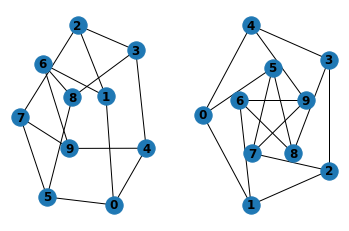

In [1]:
import matplotlib.pyplot as plt
import networkx as nx


G = nx.Graph()
G.add_node("1")
G.add_nodes_from(["2", "3"])
# 注意如果加进去临边有未出现的节点，会自动创建节点
G.add_edge(1, 2)
G.add_edge("1", "2")
# 实际上edges是个hash的key，还可以对应一个value
G.add_edges_from([("1", "2"), ("1", "3")])
list(G.adj["1"])
G.degree["1"]
G.remove_node("2")
G.remove_edge("1", "3")

G = nx.petersen_graph()
plt.subplot(121)

nx.draw(G, with_labels=True, font_weight="bold")
plt.subplot(122)

# 这个draw_shell好像是按照某种叫shell的布局绘制
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight="bold")

/tmp/ipykernel_1375961/3714512731.py:31: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  plt.colorbar(pc)


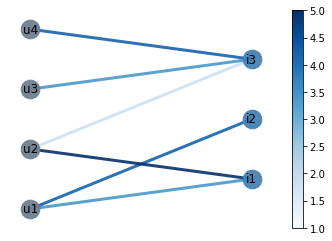

In [2]:
B = nx.Graph()

B.add_nodes_from(['u1','u2','u3','u4'], bipartite='user')
B.add_nodes_from(['i1','i2','i3'], bipartite='item')

B.add_edge('u1','i1',weight=3)
B.add_edge('u1','i2',weight=4)
B.add_edge('u2','i1',weight=5)
B.add_edge('u2','i3',weight=1)
B.add_edge('u3','i3',weight=3)
B.add_edge('u4','i3',weight=4)


from networkx.algorithms import bipartite
import matplotlib as mpl
#区域就算了 搞了一下午还是没捣鼓出来怎么画
X = ['u1','u2','u3','u4']
Y = ['i1','i2','i3']
Edges = []
pos = dict()
pos.update( (n, (1, i)) for i, n in enumerate(X) )
pos.update( (n, (2, i+0.5)) for i, n in enumerate(Y) )
nx.draw_networkx_nodes(B, pos, nodelist=X, node_color='slategray',alpha=0.95, node_size = 350)
nx.draw_networkx_nodes(B, pos, nodelist=Y, node_color='steelblue',alpha=0.95, node_size = 350)
nx.draw_networkx_labels(B,pos)
colors = [ B.edges[u,i]['weight'] for u,i in B.edges]
edges = nx.draw_networkx_edges(B, pos = pos, edge_color = colors,
        width=3, edge_cmap=plt.cm.Blues, edge_vmin = 0, alpha=0.9)
pc = mpl.collections.PatchCollection(Edges, cmap=plt.cm.Blues)
pc.set_array(colors)
plt.colorbar(pc)
ax = plt.gca()
ax.set_axis_off()
plt.show()

# 自动生成rna图
输入初始值

In [3]:
import matplotlib.pyplot as plt
import networkx as nx

# 输入
conn_permit = [[], [8], [7], [], [11], [10], [], [2, 12], [1, 11], [], [5], [4, 8], [7, 15], [14], [13], [12], [], [24], [21, 23], [20, 22, 23], [19, 22], [18], [19, 20, 26, 28], [18, 19, 25, 27], [17, 29, 31], [23, 28, 30], [22, 27, 29], [23, 26, 28], [22, 25, 27], [24, 26], [25], [24], [], [], [], [], [], [43], [42], [41], [45], [39, 44], [38], [37], [41], [40], [49], [48], [47], [46]]
exh_link = "-1  8  7 -1 11 10 -1  2  1 -1  5  4 15 14 13 12 -1 -1 21 20 19 18 28 27 31 30 29 23 22 26 25 24 -1 -1 -1 -1 -1 43 42 -1 45 44 38 37 41 40 49 48 47 46"
dp_link = "-1  8  7 -1 11 10 -1  2  1 -1  5  4 15 14 13 12 -1 -1 -1 23 22 -1 20 19 31 30 29 28 27 26 25 24 -1 -1 -1 -1 -1 43 42 -1 45 44 38 37 41 40 49 48 47 46"

# 自动生成
exh_link = [int(x) for x in exh_link.split()]
dp_link = [int(x) for x in dp_link.split()]

自动生成的代码

edges defined.
edges draw complete.
points draw complete.
labels draw complete.


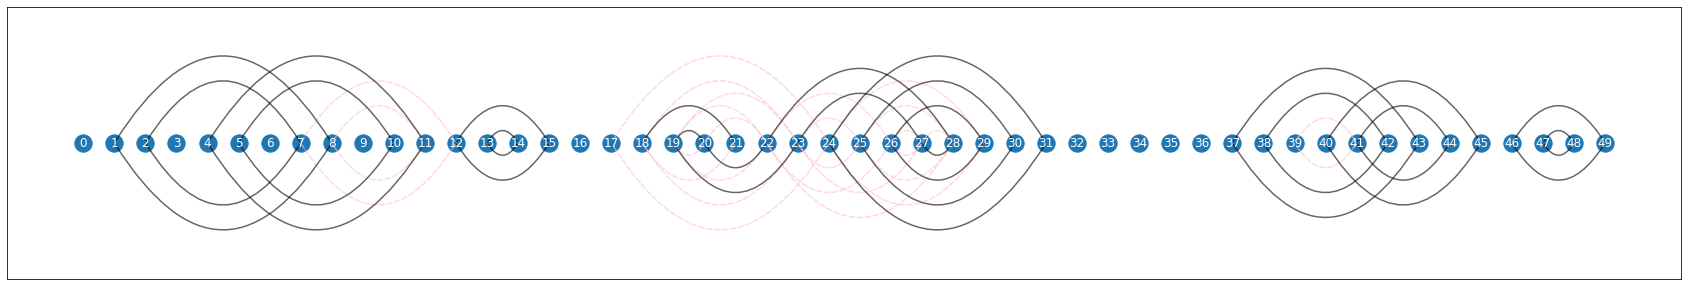

complete.


In [21]:
N = len(conn_permit)
plt.figure(figsize=(30, 5))

G = nx.Graph()

# 连接点边
G.add_nodes_from(list(range(N)))
# for i in range(N):
#     for j in conn_permit[i]:
#         G.add_edge(i, j, weight=1 if link[i] == j else 0.2)
        
# elarge = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] > 0.5]
# esmall = [(u, v) for (u, v, d) in G.edges(data=True) if d['weight'] <= 0.5]

# 自定义边
edges = {
    'up': {
        'dotted': set(),
        'solid': set(),
    },
    'down': {
        'dotted': set(),
        'solid': set(),
    },
}
for i in range(N):
    for j in conn_permit[i]:
        pair = tuple(sorted([i, j]))
        if exh_link[i] == j:
            edges['up']['solid'].add(pair)
        else:
            edges['up']['dotted'].add(pair)
            pass
        if dp_link[i] == j:
            edges['down']['solid'].add(pair)
            pass
        else:
            edges['down']['dotted'].add(pair)
            pass
print('edges defined.')
            
# 图姿态
pos = [(x, 3) for x in range(N)]

# 画曲线边(先画)
ax = plt.gca()
for direct in edges.keys():
    for xushi, tmp_edges in edges[direct].items():
        for source, target in tmp_edges:
            rad = 0.8
            rad = rad if direct == 'up' else -rad
            arrowprops = dict(
                alpha=0.6,
                arrowstyle="-",
                color="black" if xushi=='solid' else 'pink',
                connectionstyle=f"arc3,rad={rad}",
                linestyle='-' if xushi=='solid' else '--',
                linewidth=1.5
            )
            ax.annotate(
                "",
                xy=pos[source],
                xytext=pos[target],
                arrowprops=arrowprops
            )
print('edges draw complete.')

# 画点
nx.draw_networkx_nodes(G, pos)
print('points draw complete.')

# 画边（直的）
# nx.draw_networkx_edges(G, pos, edgelist=elarge, width=2,
#                        connectionstyle="arc3,rad=1")
# nx.draw_networkx_edges(G, pos, edgelist=esmall, width=2,
#                        alpha=0.5, style='dashed',
#                        connectionstyle="arc3,rad=1")

# 画label
nx.draw_networkx_labels(G, pos, font_color='w')
print('labels draw complete.')

# 画出来
# plt.axis('off')
plt.show()
print('complete.')